In [1]:
## In this DataSetUp notebook, 2 models were tested
## Model 1 includes variables svi_ptile , transit_ptile , and PTRAF_bycensus
## Model 2 includes variables svi_ptile and transit_ptile
### Linear regression and a neural network approach was tested for both models to determine the model with the best prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
sns.set()
from sklearn.metrics import accuracy_score, roc_curve, auc
import sklearn
from sklearn import linear_model
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import sklearn as skl
import statsmodels.formula.api as smf
import torch

In [4]:
# Imported and cleaned data set 

df = pd.read_csv("https://raw.githubusercontent.com/nfriedb1/DS4PH-Capstone-Neta-Xiang/main/DSPH_Capstone_Data.csv")
df = df.drop(df.loc[:, 'Unnamed: 12':'Unnamed: 23'].columns, axis = 1)
df = df.drop(["GEOID", "PTRAF"], axis = 1)
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df = df.drop(labels=[120, 403, 575], axis=0) #deleted rows with NA 
df

,ct,svi_ptile,transit_ptile,asthmavalue,PTRAF_bycensus,No_of_Stops,PTover45m_pct,lungCAvalue,CADvalue,LBWvalue
0,24510010100,0.045690,0.029276,0.087,685.684371,10,24.51,13,0.472,0.131
3,24510010200,0.015230,0.124807,0.082,686.778083,8,54.24,6,0.443,0.462
7,24510010300,0.005076,0.036980,0.082,1074.000000,6,15.38,1,0.313,0.106
9,24510010400,0.076140,0.033898,0.081,1072.952243,15,57.58,7,0.587,0.127
11,24510010500,0.081220,0.101695,0.083,1487.000000,2,50.77,1,0.384,0.176
...,...,...,...,...,...,...,...,...,...,...
635,24510280401,0.208100,0.805855,0.114,1104.810421,8,100.00,19,0.386,0.536
640,24510280402,0.360400,0.998459,0.119,731.266859,1,73.56,1,0.083,0.825
642,24510280403,0.213200,0.257319,0.114,649.600265,20,52.26,17,0.590,0.830
647,24510280404,0.832500,0.445300,0.124,1527.100404,10,52.66,12,0.321,0.853


## **Linear Regression Model 1**

### **Variables**: svi_ptile , transit_ptile , PTRAF_bycensus 

In [5]:
y_model1 = df['asthmavalue'] 
x_model1 = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct'], axis=1)
fit1 = LinearRegression().fit(x_model1, y_model1)
yhat1 = fit1.predict(x_model1)
[fit1.intercept_,fit1.coef_]

[0.08819197913089867,
 array([ 4.84609339e-02,  7.47132629e-03, -9.52324789e-07])]

In [6]:
x_model1

,svi_ptile,transit_ptile,PTRAF_bycensus
0,0.045690,0.029276,685.684371
3,0.015230,0.124807,686.778083
7,0.005076,0.036980,1074.000000
9,0.076140,0.033898,1072.952243
11,0.081220,0.101695,1487.000000
...,...,...,...
635,0.208100,0.805855,1104.810421
640,0.360400,0.998459,731.266859
642,0.213200,0.257319,649.600265
647,0.832500,0.445300,1527.100404


In [7]:
b1_model1 = fit1.coef_[0]
b2_model1 = fit1.coef_[1]
b3_model1 = fit1.coef_[2]
intercept = fit1.intercept_
print(b1_model1, b2_model1, b3_model1)

0.04846093385797968 0.007471326285174193 -9.523247893545098e-07


In [13]:
results1 = smf.ols('asthmavalue ~ svi_ptile + transit_ptile + PTRAF_bycensus', data = df).fit()
print(results1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.721     
Dependent Variable: asthmavalue      AIC:                -1429.4716
Date:               2022-05-17 16:55 BIC:                -1415.8971
No. Observations:   220              Log-Likelihood:     718.74    
Df Model:           3                F-statistic:        189.7     
Df Residuals:       216              Prob (F-statistic): 2.92e-60  
R-squared:          0.725            Scale:              8.6662e-05
--------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
--------------------------------------------------------------------
Intercept         0.0882    0.0019  46.4092  0.0000   0.0844  0.0919
svi_ptile         0.0485    0.0023  20.7433  0.0000   0.0439  0.0531
transit_ptile     0.0075    0.0025   3.0300  0.0027   0.0026  0.0123
PTRAF_bycensus   -0.0000    0.0000  -1.6704  0.0963  -0.0000

### Here we found collinearity present for variables transit_ptile and PTRAF_bycensus

In [183]:
error1 = yhat1 - y_model1 # Calculating error of LR model
error1

0      0.002972
3      0.007208
7      0.005691
9      0.010113
11     0.008472
         ...   
635   -0.010755
640   -0.006579
642   -0.014172
647    0.006408
649   -0.001828
Name: asthmavalue, Length: 220, dtype: float64

In [184]:
(error1**2).mean()

8.508677689764922e-05

                            OLS Regression Results                            
Dep. Variable:            asthmavalue   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     189.7
Date:                Sun, 15 May 2022   Prob (F-statistic):           2.92e-60
Time:                        15:12:15   Log-Likelihood:                 718.74
No. Observations:                 220   AIC:                            -1429.
Df Residuals:                     216   BIC:                            -1416.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0882      0.002     46.

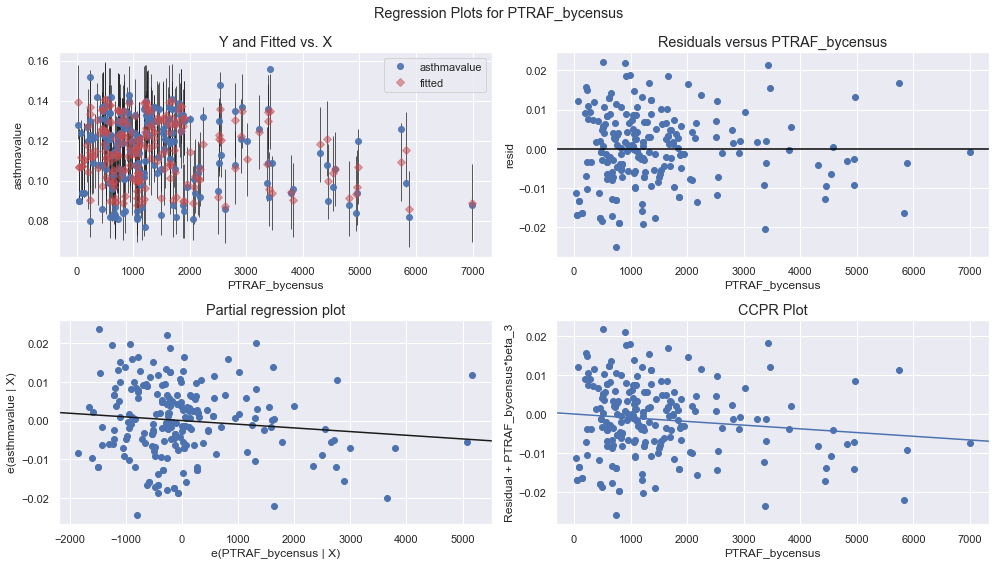

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

results1 = smf.ols('asthmavalue ~ svi_ptile + transit_ptile + PTRAF_bycensus', data = df).fit()

# fit simple linear regression model
linear_model = results1

# display model summary
print(linear_model.summary())

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,'PTRAF_bycensus',fig=fig) 

# checked residuals of predictors 

## **Neural Network Model 1**

### **Variables**: svi_ptile , transit_ptile , PTRAF_bycensus 

In [189]:
## testing NN on asthma as a prediction ## 
# asthma is our default predection for model 1, x_model1 = df['asthma']
trainFraction = 0.75
sample1 = np.random.uniform(size = 220) < trainFraction
trainingDat1 = x_model1[sample1] 
testingDat1 = x_model1[~sample1]

In [190]:
x_model1 = torch.from_numpy(x_model1.values)
y_model1 = torch.from_numpy(y_model1.values)

In [191]:
x_model1 = x_model1.float()
y_model1 = y_model1.float()

In [192]:
x1train = x_model1[sample1]
x1test = x_model1[~sample1]
y1train = y_model1[sample1]
y1test = y_model1[~sample1]

In [193]:
x1train.shape

torch.Size([165, 3])

In [196]:
neural_model1 = torch.nn.Sequential(
    torch.nn.Linear(3, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn1 = torch.nn.MSELoss(reduction='mean')
optimizer1 = torch.optim.SGD(neural_model1.parameters(), lr=1e-8)

learning_rate = 1e-18
for t in range(1000):
    y_pred1 = neural_model1(x1train)
    loss1 = loss_fn1(y_pred1, y1train)
    if t % 100 == 0:
        print(t, loss1.item())
    neural_model1.zero_grad()
    loss1.backward()
    optimizer1.step()

0 15296.9345703125
100 471.76666259765625
200 16.436382293701172
300 0.6698185205459595
400 0.32515475153923035
500 0.32450810074806213
600 0.32450810074806213
700 0.32450810074806213
800 0.32450810074806213
900 0.32450810074806213


In [197]:
y_pred1_test = neural_model1(x1test)
loss_test1 = loss_fn1(y_pred1_test, y1test)
print(loss_test1.item())

0.32586854696273804


/Users/xiang/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([55])) that is different to the input size (torch.Size([55, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [198]:
## testing NN on CAD as a prediction ##
y_model1_lung = df['lungCAvalue']
y_model1_lung = torch.from_numpy(y_model1_lung.values)
y_model1_lung = y_model1_lung.float()
y1train_lung = y_model1_lung[sample1]
y1test_lung = y_model1_lung[~sample1]

In [211]:
neural_model1 = torch.nn.Sequential(
    torch.nn.Linear(3, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn1_lung = torch.nn.MSELoss(reduction='mean')
optimizer1_lung = torch.optim.SGD(neural_model1.parameters(), lr=1e-8)

learning_rate = 1e-18
for t in range(1000):
    y_pred1_lung = neural_model1(x1train)
    loss1_lung = loss_fn1_lung(y_pred1_lung, y1train_lung)
    if t % 100 == 0:
        print(t, loss1_lung.item())
    neural_model1.zero_grad()
    loss1_lung.backward()
    optimizer1_lung.step()

0 38691.86328125
100 3903.741455078125
200 815.0667114257812
300 269.5316162109375
400 159.32440185546875
500 136.2719268798828
600 131.39776611328125
700 130.36305236816406
800 130.14295959472656
900 130.09600830078125


In [212]:
y_pred1_test_lung = neural_model1(x1test)
loss_test1_lung = loss_fn1_lung(y_pred1_test_lung, y1test_lung)
print(loss_test1_lung.item()) 
# Loss is large for lung cancer, NN doesn't perform too well

135.91049194335938


In [213]:
## testing NN on coronary artery disease as a prediction ##
y_model1_CAD = df['CADvalue']
y_model1_CAD = torch.from_numpy(y_model1_CAD.values)
y_model1_CAD = y_model1_CAD.float()
y1train_CAD = y_model1_CAD[sample1]
y1test_CAD = y_model1_CAD[~sample1]

In [215]:
neural_model1 = torch.nn.Sequential(
    torch.nn.Linear(3, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn1_CAD = torch.nn.MSELoss(reduction='mean')
optimizer1_CAD = torch.optim.SGD(neural_model1.parameters(), lr=1e-8)

learning_rate = 1e-16
for t in range(1000):
    y_pred1_CAD = neural_model1(x1train)
    loss1_CAD = loss_fn1_CAD(y_pred1_CAD, y1train_CAD)
    if t % 100 == 0:
        print(t, loss1_CAD.item())
    neural_model1.zero_grad()
    loss1_CAD.backward()
    optimizer1_CAD.step()

0 0.3657435476779938
100 0.36574187874794006
200 0.36574018001556396
300 0.36573848128318787
400 0.36573681235313416
500 0.36573511362075806
600 0.36573347449302673
700 0.36573177576065063
800 0.36573007702827454
900 0.36572837829589844


In [216]:
y_pred1_test_CAD = neural_model1(x1test)
loss_test1_CAD = loss_fn1_CAD(y_pred1_test_CAD, y1test_CAD)
print(loss_test1_CAD.item()) 
# NN performs decently well for CAD 

0.35630443692207336


In [217]:
## testing NN on LBW as a prediction ##
y_model1_LBW = df['LBWvalue']
y_model1_LBW = torch.from_numpy(y_model1_LBW.values)
y_model1_LBW = y_model1_LBW.float()
y1train_LBW = y_model1_LBW[sample1]
y1test_LBW = y_model1_LBW[~sample1]

In [218]:
neural_model1 = torch.nn.Sequential(
    torch.nn.Linear(3, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn1_LBW = torch.nn.MSELoss(reduction='mean')
optimizer1_LBW = torch.optim.SGD(neural_model1.parameters(), lr=1e-8)

learning_rate = 1e-17
for t in range(1000):
    y_pred1_LBW = neural_model1(x1train)
    loss1_LBW = loss_fn1_LBW(y_pred1_LBW, y1train_LBW)
    if t % 100 == 0:
        print(t, loss1_LBW.item())
    neural_model1.zero_grad()
    loss1_LBW.backward()
    optimizer1_LBW.step()

0 1236.49365234375
100 328.5020751953125
200 90.77620697021484
300 25.538095474243164
400 7.408098220825195
500 2.3529410362243652
600 0.9422592520713806
700 0.5485275387763977
800 0.43863147497177124
900 0.4079574644565582


In [219]:
y_pred1_test_LBW = neural_model1(x1test)
loss_test1_LBW = loss_fn1_CAD(y_pred1_test_LBW, y1test_LBW)
print(loss_test1_LBW.item()) 
# NN performs decently well for LBW 

0.3535512089729309


## **Linear Regression Model 2**

### **Variables**: svi_ptile , transit_ptile

In [220]:
y_model2 = df['asthmavalue']
x_model2 = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct', 'PTRAF_bycensus'], axis=1)
fit2 = LinearRegression().fit(x_model2, y_model2)
yhat2 = fit2.predict(x_model2)
[fit2.intercept_,fit2.coef_]

[0.08615421688143492, array([0.04810285, 0.00918508])]

In [221]:
x_model2

,svi_ptile,transit_ptile
0,0.045690,0.029276
3,0.015230,0.124807
7,0.005076,0.036980
9,0.076140,0.033898
11,0.081220,0.101695
...,...,...
635,0.208100,0.805855
640,0.360400,0.998459
642,0.213200,0.257319
647,0.832500,0.445300


In [222]:
b1_model2 = fit1.coef_[0]
b2_model2 = fit1.coef_[1]
intercept2 = fit2.intercept_
print(b1_model2, b2_model2)

0.04846093385797968 0.007471326285174193


In [223]:
results2 = smf.ols('asthmavalue ~ svi_ptile + transit_ptile', data = df).fit()
print(results2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.719     
Dependent Variable: asthmavalue      AIC:                -1428.6480
Date:               2022-05-15 15:18 BIC:                -1418.4671
No. Observations:   220              Log-Likelihood:     717.32    
Df Model:           2                F-statistic:        280.9     
Df Residuals:       217              Prob (F-statistic): 6.15e-61  
R-squared:          0.721            Scale:              8.7377e-05
--------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept          0.0862    0.0015  58.8876  0.0000  0.0833  0.0890
svi_ptile          0.0481    0.0023  20.5925  0.0000  0.0435  0.0527
transit_ptile      0.0092    0.0023   4.0796  0.0001  0.0047  0.0136
------------------------------------------------------------

In [224]:
error2 = yhat2 - y_model2
error2

0      0.001621
3      0.006033
7      0.004738
9      0.009128
11     0.007995
         ...   
635   -0.010434
640   -0.006339
642   -0.015227
647    0.006290
649   -0.000597
Name: asthmavalue, Length: 220, dtype: float64

In [225]:
(error2**2).mean()

8.618587951120237e-05

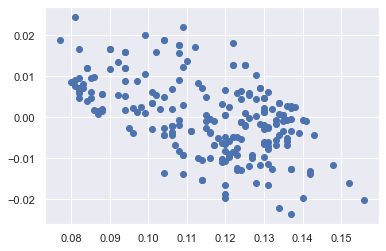

In [226]:
plt.plot(asthmavalue, error2, 'o')

## **Neural Network Model 2**

### **Variables**: svi_ptile , transit_ptile

In [228]:
trainFraction = 0.75
sample2 = np.random.uniform(size = 220) < trainFraction
trainingDat2 = x_model2[sample2]
testingDat2 = x_model2[~sample2]

In [229]:
x_model2 = torch.from_numpy(x_model2.values)
y_model2 = torch.from_numpy(y_model2.values)

In [230]:
x_model2 = x_model2.float()
y_model2 = y_model2.float()

In [231]:
x2train = x_model2[sample2]
x2test = x_model2[~sample2]
y2train = y_model2[sample2]
y2test = y_model2[~sample2]

In [232]:
x2train.shape

torch.Size([164, 2])

In [248]:
# 2 hidden nodes

neural_model2 = torch.nn.Sequential(
    torch.nn.Linear(2, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn2 = torch.nn.MSELoss(reduction='mean')
optimizer2 = torch.optim.SGD(neural_model2.parameters(), lr=1e-8)

learning_rate = 1e-7
for t in range(1000):
    y_pred2 = neural_model2(x2train)
    loss2 = loss_fn2(y_pred2, y2train)
    if t % 100 == 0:
        print(t, loss2.item())
    neural_model2.zero_grad()
    loss2.backward()
    optimizer2.step()

0 0.0030981567688286304
100 0.0030981567688286304
200 0.0030981567688286304
300 0.0030981567688286304
400 0.0030981567688286304
500 0.0030981567688286304
600 0.0030981567688286304
700 0.0030981567688286304
800 0.0030981567688286304
900 0.0030981567688286304


In [249]:
# loss is slowly decreasing

In [250]:
y_pred2_test = neural_model2(x2test)
loss_test2 = loss_fn2(y_pred2_test, y2test)
print(loss_test2.item())

0.0030830688774585724


In [251]:
## testing NN on lung cancer as a prediction ##
y_model2_lung = df['lungCAvalue']
y_model2_lung = torch.from_numpy(y_model2_lung.values)
y_model2_lung = y_model2_lung.float()
y2train_lung = y_model2_lung[sample2]
y2test_lung = y_model2_lung[~sample2]

In [269]:
neural_model2 = torch.nn.Sequential(
    torch.nn.Linear(2, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn2_lung = torch.nn.MSELoss(reduction='mean')
optimizer2_lung = torch.optim.SGD(neural_model2.parameters(), lr=1e-8)

learning_rate = 1e-12
for t in range(1000):
    y_pred2_lung = neural_model2(x2train)
    loss2_lung = loss_fn2_lung(y_pred2_lung, y2train_lung)
    if t % 100 == 0:
        print(t, loss2_lung.item())
    neural_model2.zero_grad()
    loss2_lung.backward()
    optimizer2_lung.step()

0 256.27191162109375
100 256.2706298828125
200 256.2693786621094
300 256.2680969238281
400 256.2668151855469
500 256.2655334472656
600 256.2642822265625
700 256.26300048828125
800 256.26171875
900 256.26043701171875


In [270]:
y_pred2_test_lung = neural_model2(x2test)
loss_test2_lung = loss_fn2_lung(y_pred2_test_lung, y2test_lung)
print(loss_test2_lung.item())

230.52488708496094


In [266]:
## testing NN on coronary artery disease as a prediction ##
y_model2_CAD = df['CADvalue']
y_model2_CAD = torch.from_numpy(y_model2_CAD.values)
y_model2_CAD = y_model2_CAD.float()
y2train_CAD = y_model2_CAD[sample2]
y2test_CAD = y_model2_CAD[~sample2]

In [274]:
neural_model2 = torch.nn.Sequential(
    torch.nn.Linear(2, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn2_CAD = torch.nn.MSELoss(reduction='mean')
optimizer2_CAD = torch.optim.SGD(neural_model2.parameters(), lr=1e-8)

learning_rate = 1e-13
for t in range(1000):
    y_pred2_CAD = neural_model2(x2train)
    loss2_CAD = loss_fn2_CAD(y_pred2_CAD, y2train_CAD)
    if t % 100 == 0:
        print(t, loss2_CAD.item())
    neural_model2.zero_grad()
    loss2_CAD.backward()
    optimizer2_CAD.step()

0 0.05205787345767021
100 0.05205787345767021
200 0.05205787345767021
300 0.05205787345767021
400 0.05205787345767021
500 0.05205787345767021
600 0.05205787345767021
700 0.05205787345767021
800 0.05205787345767021
900 0.05205787345767021


In [275]:
y_pred2_test_CAD = neural_model2(x2test)
loss_test2_CAD = loss_fn2_CAD(y_pred2_test_CAD, y2test_CAD)
print(loss_test2_CAD.item())

0.04854520410299301


In [277]:
## testing NN on LBW as a prediction ##
y_model2_LBW = df['LBWvalue']
y_model2_LBW = torch.from_numpy(y_model2_LBW.values)
y_model2_LBW = y_model2_LBW.float()
y2train_LBW = y_model2_LBW[sample2]
y2test_LBW = y_model2_LBW[~sample2]

In [285]:
neural_model2 = torch.nn.Sequential(
    torch.nn.Linear(2, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn2_LBW = torch.nn.MSELoss(reduction='mean')
optimizer2_LBW = torch.optim.SGD(neural_model2.parameters(), lr=1e-8)

learning_rate = 1e-9
for t in range(1000):
    y_pred2_LBW = neural_model2(x2train)
    loss2_LBW = loss_fn2_LBW(y_pred2_LBW, y2train_LBW)
    if t % 100 == 0:
        print(t, loss2_LBW.item())
    neural_model2.zero_grad()
    loss2_LBW.backward()
    optimizer2_LBW.step()

0 0.09652438759803772
100 0.09652438759803772
200 0.09652438759803772
300 0.09652438759803772
400 0.09652438759803772
500 0.09652438759803772
600 0.09652438759803772
700 0.09652438759803772
800 0.09652438759803772
900 0.09652438759803772


In [286]:
y_pred2_test_LBW = neural_model2(x2test)
loss_test2_LBW = loss_fn2_LBW(y_pred2_test_LBW, y2test_LBW)
print(loss_test2_LBW.item())

0.12121649086475372


### **Error & Loss Rates Comparison** 

**Model 1 LR (asthma):** 8.508677689764922e-05

**Model 1 NN (2 nodes, asthma):** 0.32586854696273804

**Model 1 NN (2 nodes, lung cancer):** 135.91049194335938

**Model 1 NN (2 nodes, CAD):** 0.35630443692207336

**Model 1 NN (2 nodes, LBW):** 0.3535512089729309



**Model 2 LR (asthma):** 8.618587951120237e-05

**Model 2 NN (2 nodes, asthma):** 0.0030830688774585724

**Model 2 NN (2 nodes, lung):** 230.52488708496094

**Model 2 NN (2 nodes, CAD):**  0.04854520410299301

**Model 2 NN (2 nodes, LBW):** 0.12121649086475372

In [39]:
#### POISSON REGRESSION FOR LUNG CANCER CASES (discrete count data)

pois = linear_model.PoissonRegressor()

y_model3 = df['lungCAvalue']
x_model3 = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct', 'PTRAF_bycensus'], axis=1)
fit3 = pois.fit(x_model3, y_model3)
yhat3 = fit3.predict(x_model3)
[fit3.intercept_,fit3.coef_]

pois.score(x_model3, y_model3) # this is WORSE than the linear regression model!


AttributeError: 'OLSResults' object has no attribute 'PoissonRegressor'

In [22]:
########## ALL THE FINAL MODELS WE ARE USING
########## ASTHMA IS WELL PREDICTED, THE OTHERS ARE NOT

y1 = df['asthmavalue']
y2 = df['CADvalue']
y3 = df['lungCAvalue']
y4 = df['LBWvalue']
xval = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct', 'PTRAF_bycensus'], axis=1)


In [23]:
finalfit1 = smf.ols('asthmavalue ~ svi_ptile + transit_ptile', data = df).fit()
finalfit1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.719     
Dependent Variable: asthmavalue      AIC:                -1428.6480
Date:               2022-05-15 11:18 BIC:                -1418.4671
No. Observations:   220              Log-Likelihood:     717.32    
Df Model:           2                F-statistic:        280.9     
Df Residuals:       217              Prob (F-statistic): 6.15e-61  
R-squared:          0.721            Scale:              8.7377e-05
--------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept          0.0862    0.0015  58.8876  0.0000  0.0833  0.0890
svi_ptile          0.0481    0.0023  20.5925  0.0000  0.0435  0.0527
transit_ptile      0.0092    0.0023   4.0796  0.0001  0.0047  0.0136
-------------------------------------------------------------------
Omnibus:               0.667         Durbin-Watson:           1.259
Prob(Omnibus):         0.716         Jarque-Bera (JB):        0.796
Skew:                  -0.091        Prob(JB):                0.672
Kurtosis:              2.768         Condition No.:           5    
===================================================================

"""

In [24]:
finalfit2 = smf.ols('CADvalue ~ svi_ptile + transit_ptile', data = df).fit()
finalfit2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.039   
Dependent Variable: CADvalue         AIC:                -84.7571
Date:               2022-05-15 11:18 BIC:                -74.5762
No. Observations:   220              Log-Likelihood:     45.379  
Df Model:           2                F-statistic:        5.388   
Df Residuals:       217              Prob (F-statistic): 0.00520 
R-squared:          0.047            Scale:              0.039294
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.5227   0.0310 16.8482 0.0000  0.4616  0.5839
svi_ptile         -0.0151   0.0495 -0.3044 0.7611 -0.1127  0.0826
transit_ptile     -0.1420   0.0477 -2.9732 0.0033 -0.2361 -0.0479
-----------------------------------------------------------------
Omnibus:              7.243        Durbin-Watson:           1.462
Prob(Omnibus):        0.027        Jarque-Bera (JB):        4.586
Skew:                 0.186        Prob(JB):                0.101
Kurtosis:             2.399        Condition No.:           5    
=================================================================

"""

In [25]:
finalfit3 = smf.ols('lungCAvalue ~ svi_ptile + transit_ptile', data = df).fit()
finalfit3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.075    
Dependent Variable: lungCAvalue      AIC:                1530.8488
Date:               2022-05-15 11:19 BIC:                1541.0297
No. Observations:   220              Log-Likelihood:     -762.42  
Df Model:           2                F-statistic:        9.824    
Df Residuals:       217              Prob (F-statistic): 8.24e-05 
R-squared:          0.083            Scale:              60.763   
-------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept        8.4849    1.2200  6.9547  0.0000   6.0803  10.8896
svi_ptile        7.0510    1.9480  3.6197  0.0004   3.2117  10.8904
transit_ptile    2.2222    1.8775  1.1836  0.2379  -1.4783   5.9227
------------------------------------------------------------------
Omnibus:               8.438        Durbin-Watson:           1.694
Prob(Omnibus):         0.015        Jarque-Bera (JB):        8.475
Skew:                  0.477        Prob(JB):                0.014
Kurtosis:              3.120        Condition No.:           5    
==================================================================

"""

In [26]:
finalfit4 = smf.ols('LBWvalue ~ svi_ptile + transit_ptile', data = df).fit()
finalfit4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.104   
Dependent Variable: LBWvalue         AIC:                83.0132 
Date:               2022-05-15 11:19 BIC:                93.1941 
No. Observations:   220              Log-Likelihood:     -38.507 
Df Model:           2                F-statistic:        13.73   
Df Residuals:       217              Prob (F-statistic): 2.42e-06
R-squared:          0.112            Scale:              0.084240
------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept        0.4243    0.0454  9.3397  0.0000   0.3347  0.5138
svi_ptile        0.3018    0.0725  4.1606  0.0000   0.1588  0.4447
transit_ptile    0.1113    0.0699  1.5917  0.1129  -0.0265  0.2491
-----------------------------------------------------------------
Omnibus:              19.037       Durbin-Watson:          1.890 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       17.230
Skew:                 -0.612       Prob(JB):               0.000 
Kurtosis:             2.384        Condition No.:          5     
=================================================================

"""

In conclusion, we used linear regression model 1 for all 4 health outcomes, but it was only a good predictor for asthma values. In addition, LR model 1 showed the smallest error/loss for asthma. After comparing r^2 values for other health outcomes of model 1 and 2, 